Importing Libraries

In [412]:
import numpy as np
import plotly.io as pio
import plotly.graph_objs as go
from PIL import Image
from skimage import color
from plotly import subplots
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
%matplotlib inline
import glob

Loading the face image data

In [440]:
face_images = glob.glob('face_data/*.bmp')
len(face_images)

177

Flatten row vector and combine data

In [414]:
images_open = []
images_flatten = []

for i in face_images:
    images_open.append(np.array(Image.open(i)))

for i in images_open:
    images_flatten.append(np.asarray([i.flatten()]))

Split data into training set and testing set - training length is 157, testing length is 20

In [441]:
Image_flat_train, Image_flat_test = images_flatten[:157], images_flatten[157:]
len(Image_flat_test)

20

Compute mean image of the training set

In [442]:
mean = np.mean(img_flat_train, axis = 0) 
Y = img_flat_train - mean
Y.shape

(157, 65536)

Compute covariance matrix

In [443]:
#size is -> size_train * size_train
size_train = len(Image_flat_train)
Y_t = Y.T
Covarience = (Y @ Y_t) / size_train
Covarience.shape

(157, 157)

Eigen decomposition

In [444]:
eigen_value, eigen_vector = np.linalg.eigh(Covarience)
sorted_eig  = np.argsort(-eigen_value)
eigen_value = eigen_value[sorted_eig]
eigen_vector = eigen_vector[:, sorted_eig]
eigen_vector.shape

(157, 157)

Top K eigenvectors based on the K largest eigenvalues where K = 30

In [445]:
K_eigen_vector = eigen_vector[:30, :]

Find Eigenfaces

In [447]:
Projection = Y_t @ K_eigen_vector.T
Projection_t = Projection.T
Projection.shape  #(65536*K) 

(65536, 30)

Normalize the eigenfaces

In [448]:
Eigenfaces_norm = Projection/np.linalg.norm(Projection, axis = 0)
Eigenfaces_norm_t = Eigenfaces_norm.T
Eigenfaces_norm.shape

(65536, 30)

Display the eigenface images

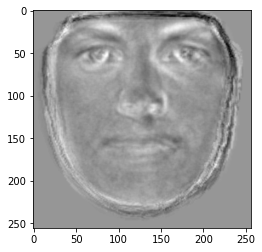

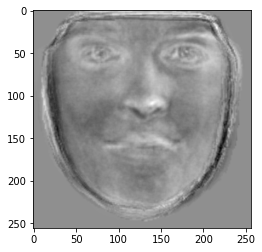

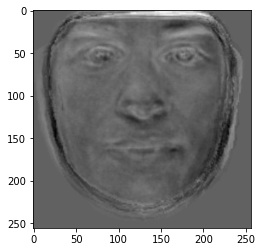

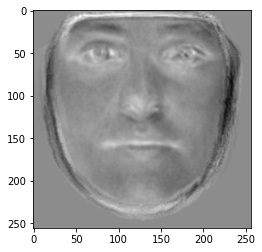

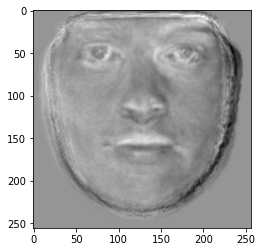

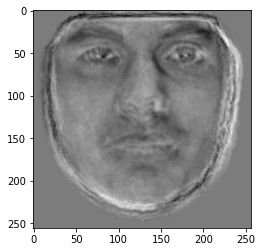

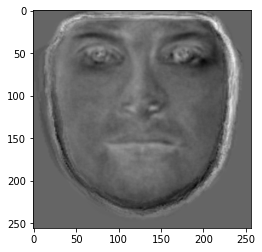

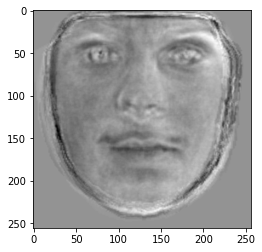

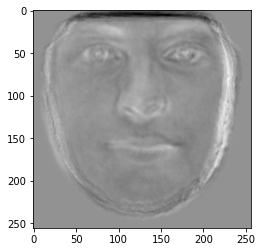

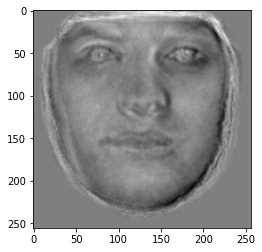

In [449]:
for i in range(10):
    img = Eigenfaces_norm_t[i].reshape(256,256)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
#Displaying first 10 Eigen faces

Reconstruct face images

In [450]:
A = img_flat_test - mean
B = A @ Eigenfaces_norm
C = B @ Eigenfaces_norm_t
Recon = C + mean
Recon.shape  #(test_size, 65536)

(20, 65536)

Show 5 testing images

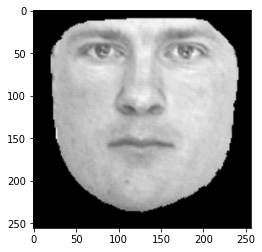

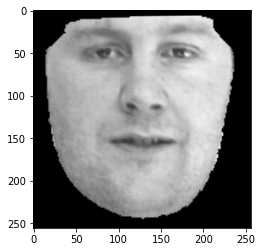

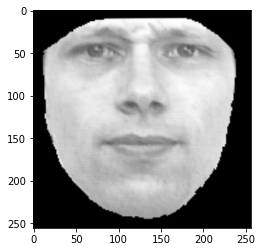

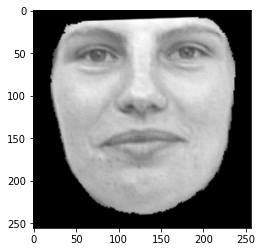

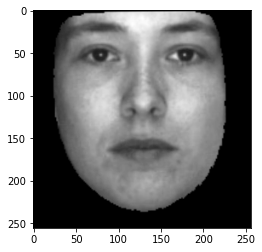

In [451]:
for i in range(5):
    img = Image_flat_test[i].reshape(256,256)
    plt.imshow(img, cmap = 'gray')
    plt.show()

Reshape and display the 5 reconstructed face

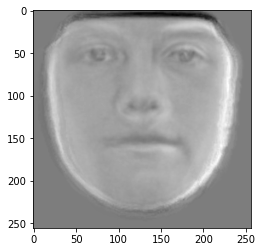

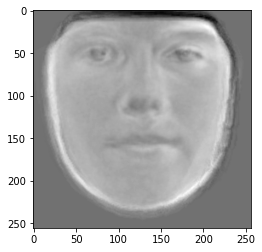

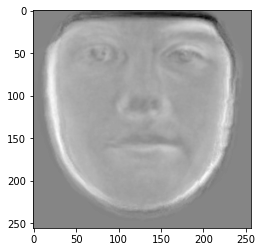

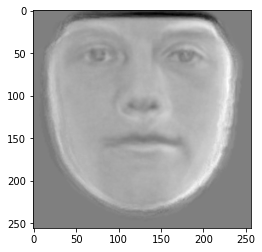

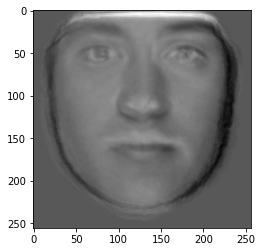

In [453]:
for i in range(5):
    img = Recon[i].reshape(256,256)
    plt.imshow(img, cmap = 'gray')
    plt.show()
    
#Displaying first 5 Reconstructed faces

Compute the error value

In [454]:
Error_value = (sum(sum(np.square(Recon - img_flat_test))))/20
Error_value

286538295.1782612

Trying different numbers of K - 10,30,50,100,150

In [455]:
errors = []
PC = []
K_val = [10,30,50,100,150]

for k in K_val:
    K_eigen_vector = eigen_vector[:k]
    Projection = Y_t @ K_eigen_vector.T
    Projection_t = Projection.T
    Eigenfaces_norm = Projection/np.linalg.norm(Projection, axis = 0)
    Eigenfaces_norm_t = Eigenfaces_norm.T
    
    A = img_flat_test - mean
    B = A @ Eigenfaces_norm
    C = B @ Eigenfaces_norm_t
    Recon = C + mean
    
    Error_value = (sum(sum(np.square(Recon - img_flat_test))))/20
    errors.append(Error_value)
    PC.append(k)

Plotting the curve

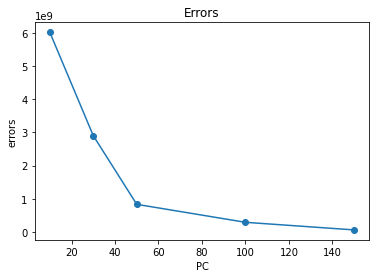

In [456]:
x = PC
y = errors[::-1]
  
# plotting the points 
plt.plot(x , y , marker='o')

plt.xlabel('PC')
plt.ylabel('errors')
plt.title('Errors')
plt.show()